In [19]:
import getpass, os

os.environ['STABILITY_HOST'] = 'grpc.stability.ai:443'
os.environ['STABILITY_KEY'] = getpass.getpass('Enter your API Key')

In [20]:
import io
import os
import warnings
import random

from IPython.display import display
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation


stability_api = client.StabilityInference(
    key=os.environ['STABILITY_KEY'], 
    verbose=True,
)

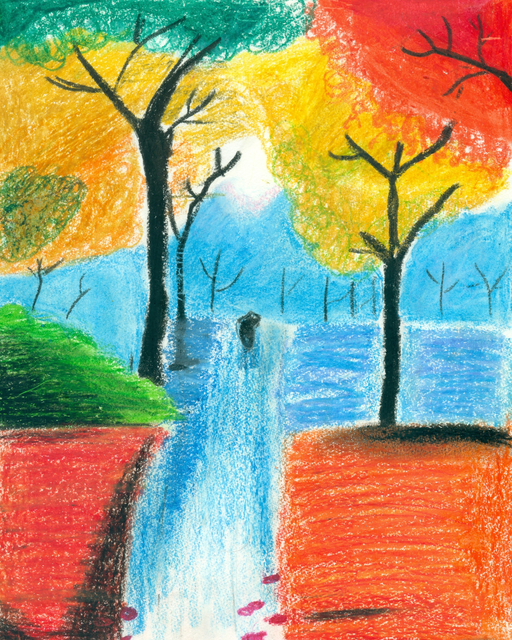

In [3]:
img1 = Image.open("scan0001.jpg")
img1 = img1.resize((512 , 640) , Image.LANCZOS)
display(img1)

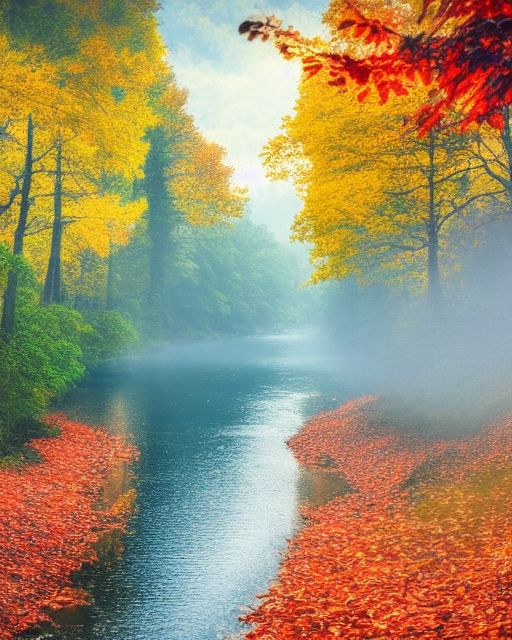

In [21]:
#84778
#95408   
image1_gen = stability_api.generate(
    prompt = "a realistic photo of a forest in the autumn season with a river, 8K HDR",
    start_schedule = 0.8,
    init_image = img1,
    seed = 95408
)

for resp in image1_gen:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            img1_c = Image.open(io.BytesIO(artifact.binary))
            display(img1_c)

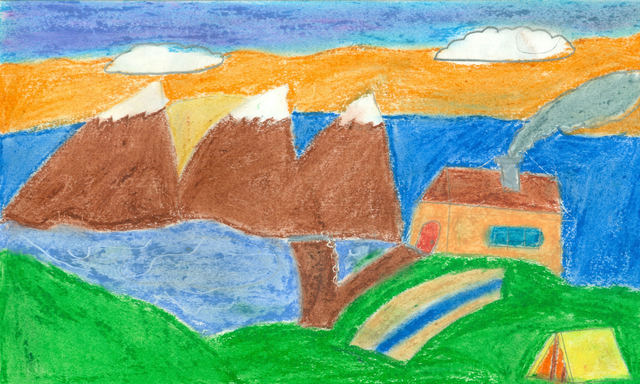

In [36]:
img2 = Image.open("scan0002.jpg")
img2 = img2.resize((640,384) , Image.LANCZOS)

display(img2)

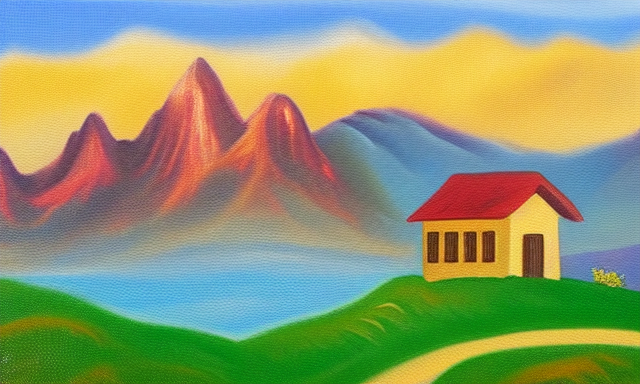

In [40]:
#79597@0.65
#47210@0.825
p2 = "Oil painting of a Beautiful landscape featuring a house, with three mountains in the background, vibrant"
image2_gen = stability_api.generate(
    prompt = p2,
    start_schedule = 0.825,
    init_image = img2,
    seed = 47210
)
for resp in image2_gen:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            img2_c = Image.open(io.BytesIO(artifact.binary))
            display(img2_c)